In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\office\appdata\local\programs\python\python312\lib\site-packages (2.2.2)




[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


*LOAD THE DATASET*

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load the dataset
file_path = r"C:\Users\Office\OneDrive\Desktop\Internship SVcodetech\P1-3time\Ecommerce_Sales_Prediction_Dataset.csv"
data = pd.read_csv(file_path)

#Display the first few rows
print(data.head())

         Date Product_Category   Price  Discount Customer_Segment  \
0  01-01-2023           Sports  932.80     35.82       Occasional   
1  02-01-2023             Toys  569.48      3.60          Premium   
2  03-01-2023       Home Decor  699.68      3.56          Premium   
3  04-01-2023             Toys  923.27      0.61          Premium   
4  05-01-2023             Toys  710.17     47.83          Premium   

   Marketing_Spend  Units_Sold  
0          6780.38          32  
1          6807.56          16  
2          3793.91          27  
3          9422.75          29  
4          1756.83          17  


*EXPLORE THE DATA*

In [3]:
#check dataset info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1000 non-null   object 
 1   Product_Category  1000 non-null   object 
 2   Price             1000 non-null   float64
 3   Discount          1000 non-null   float64
 4   Customer_Segment  1000 non-null   object 
 5   Marketing_Spend   1000 non-null   float64
 6   Units_Sold        1000 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB
None


In [4]:
#check basic statistics
print(data.describe())

             Price     Discount  Marketing_Spend   Units_Sold
count  1000.000000  1000.000000      1000.000000  1000.000000
mean    505.241920    24.919750      4912.830240    29.631000
std     289.791248    14.439951      2840.602656     7.267989
min      14.590000     0.010000       100.300000     5.000000
25%     243.342500    12.995000      2413.020000    24.000000
50%     509.310000    24.965000      4837.245000    30.000000
75%     747.592500    37.562500      7319.675000    34.000000
max     999.420000    49.920000      9995.620000    57.000000


In [5]:
#check for missing values
data.isnull().sum()

Date                0
Product_Category    0
Price               0
Discount            0
Customer_Segment    0
Marketing_Spend     0
Units_Sold          0
dtype: int64

*CLEAN THE DATA*

In [6]:
# Remove duplicates
data = data.drop_duplicates()

In [7]:
#fill missing values
data['Price'] = data['Price'].fillna(data['Price'].mean())

*Perform Exploratory Data Analysis (EDA)*

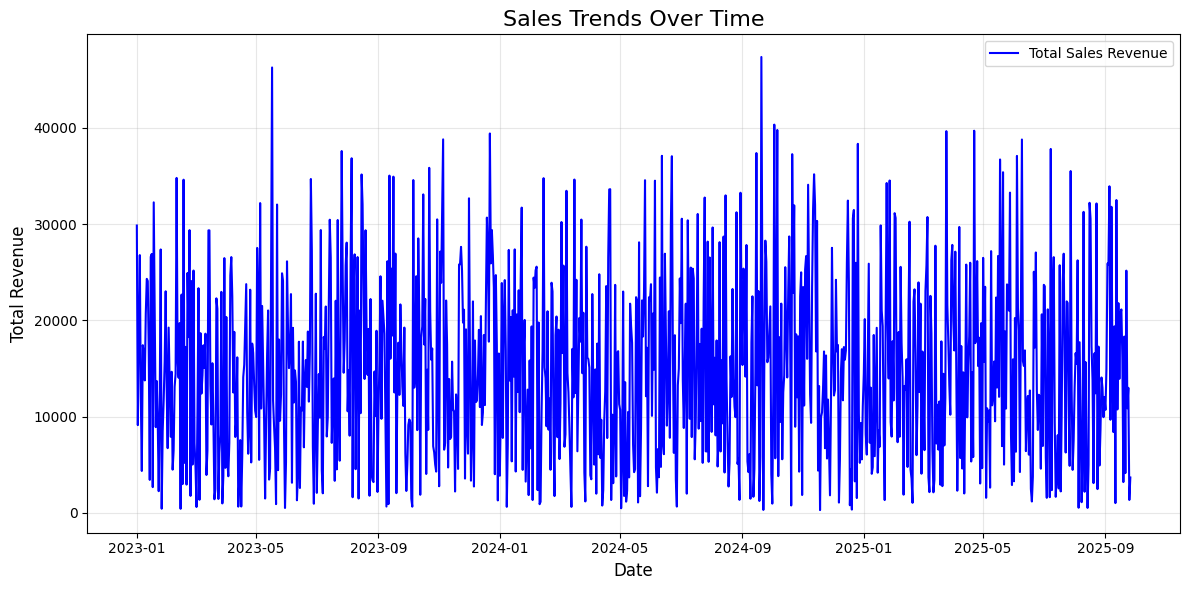

In [50]:
# Aggregate daily sales for the line graph
daily_sales = data.groupby('Date')['Total_Revenue'].sum()

# Plotting Sales Trends Over Time
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, color='blue', label='Total Sales Revenue')
plt.title("Sales Trends Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

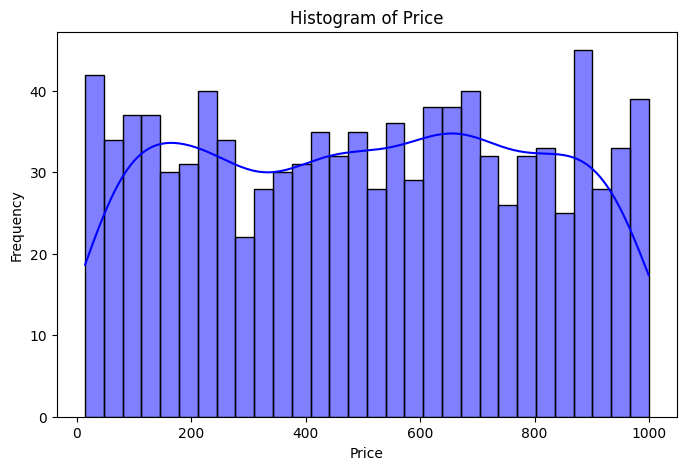

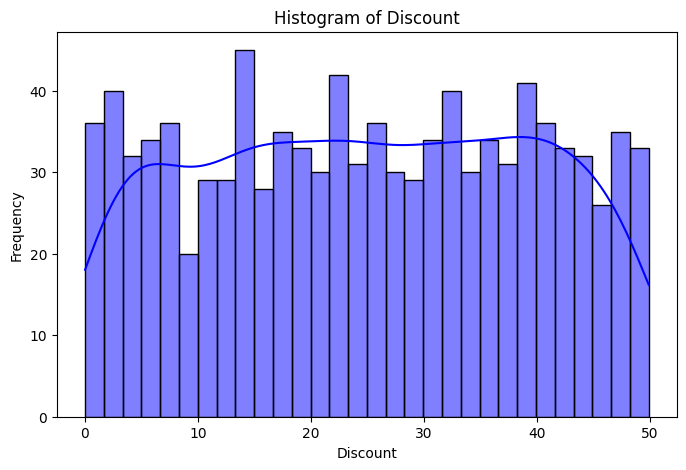

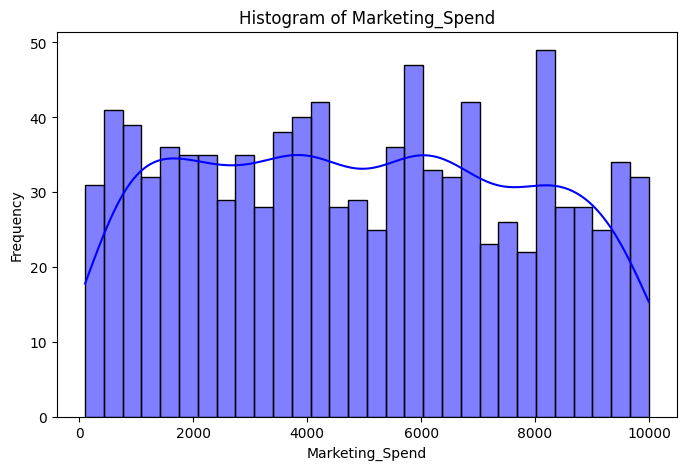

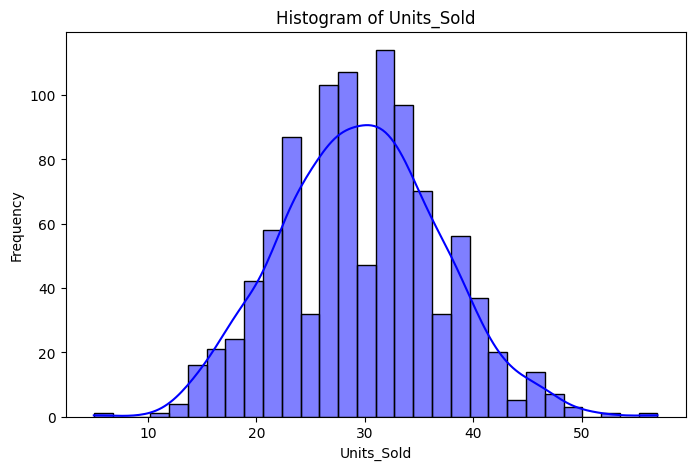

In [ ]:
#Visualize the distribution of numerical columns
numerical_columns = ['Price', 'Discount', 'Marketing_Spend', 'Units_Sold']
for column in numerical_columns:
    plt.figure(figsize=(8,5))
    sns.histplot(data[column], kde=True, bins=30, color='blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

C:\Users\Office\AppData\Local\Temp\ipykernel_6856\122037313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette="viridis")


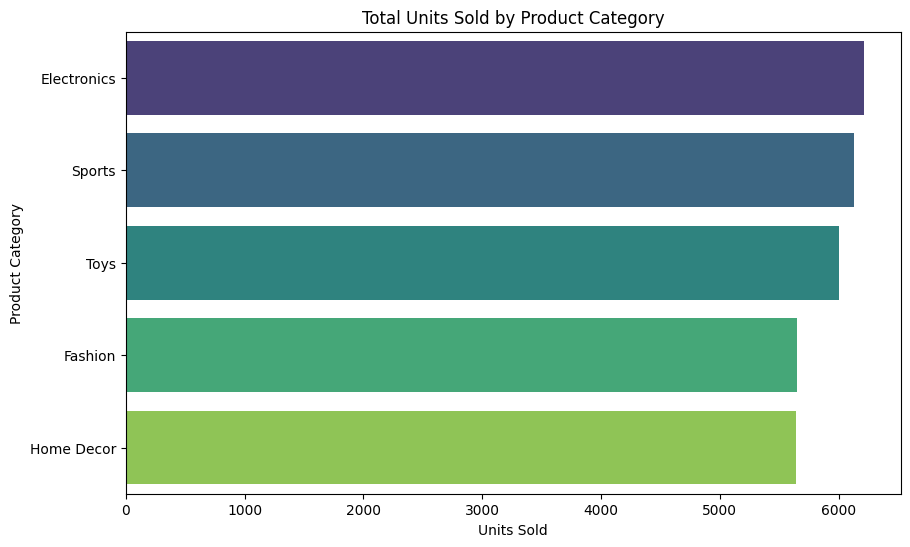

In [41]:
# Visualization 2: Category-wise Total Units Sold
category_sales = data.groupby('Product_Category')['Units_Sold'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.values, y=category_sales.index, palette="viridis")
plt.title("Total Units Sold by Product Category")
plt.xlabel("Units Sold")
plt.ylabel("Product Category")
plt.show()

C:\Users\Office\AppData\Local\Temp\ipykernel_6856\3852404837.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Product_Category', data=data , palette='Set2')


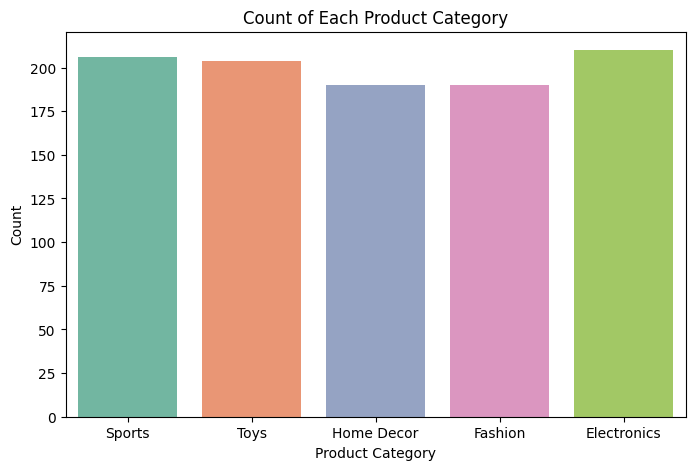

In [17]:
#visualize categorical columns
plt.figure(figsize=(8,5))
sns.countplot(x='Product_Category', data=data , palette='Set2')
plt.title('Count of Each Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

C:\Users\Office\AppData\Local\Temp\ipykernel_6856\925388751.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Customer_Segment', data=data, palette='Set3')


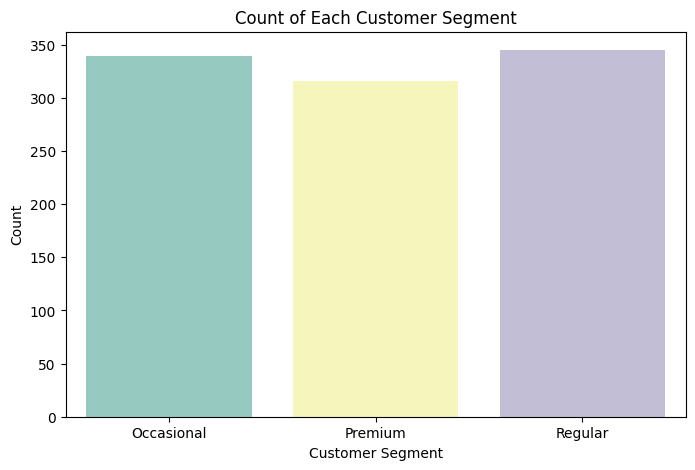

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(x='Customer_Segment', data=data, palette='Set3')
plt.title('Count of Each Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.show()

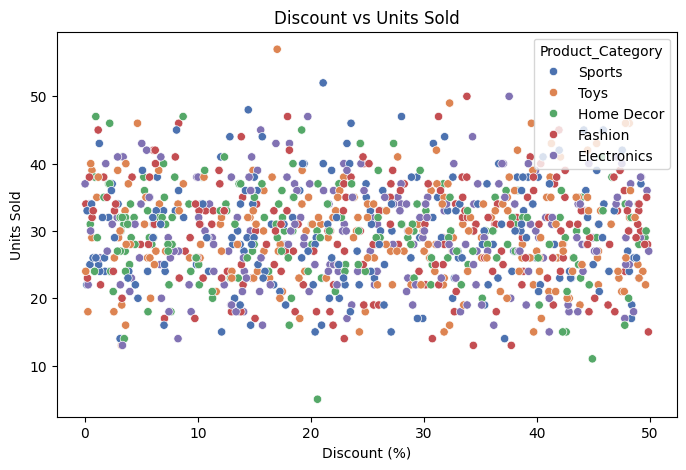

In [47]:
# Visualization 3: Discount vs Units Sold
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='Discount', y='Units_Sold', hue='Product_Category', palette="deep")
plt.title("Discount vs Units Sold")
plt.xlabel("Discount (%)")
plt.ylabel("Units Sold")
plt.show()

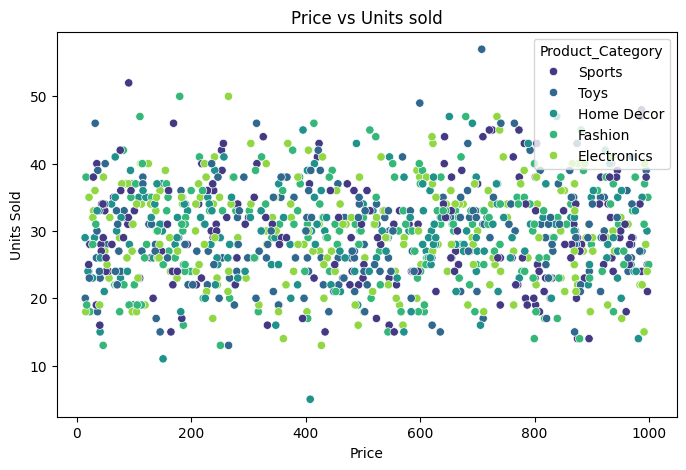

In [45]:
# Analyze relationship between price and unit sold
plt.figure(figsize=(8,5))
sns.scatterplot(x='Price', y='Units_Sold', hue='Product_Category', data=data, palette='viridis')
plt.title('Price vs Units sold')
plt.xlabel('Price')
plt.ylabel('Units Sold')
plt.show()

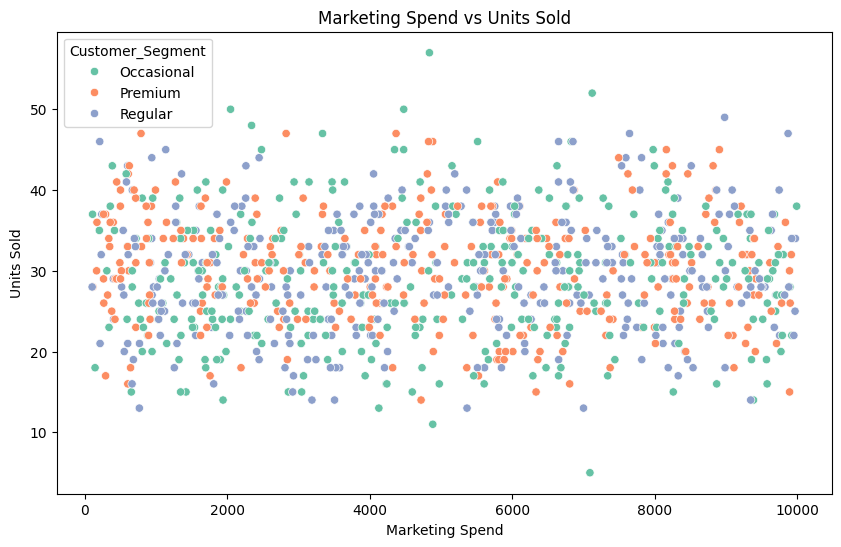

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Marketing_Spend', y='Units_Sold', data=data, hue='Customer_Segment', palette='Set2')
plt.title('Marketing Spend vs Units Sold')
plt.xlabel('Marketing Spend')
plt.ylabel('Units Sold')
plt.show()

C:\Users\Office\AppData\Local\Temp\ipykernel_6856\2880036101.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_effect = data.groupby(pd.cut(data['Discount'], bins=10))['Units_Sold'].mean()


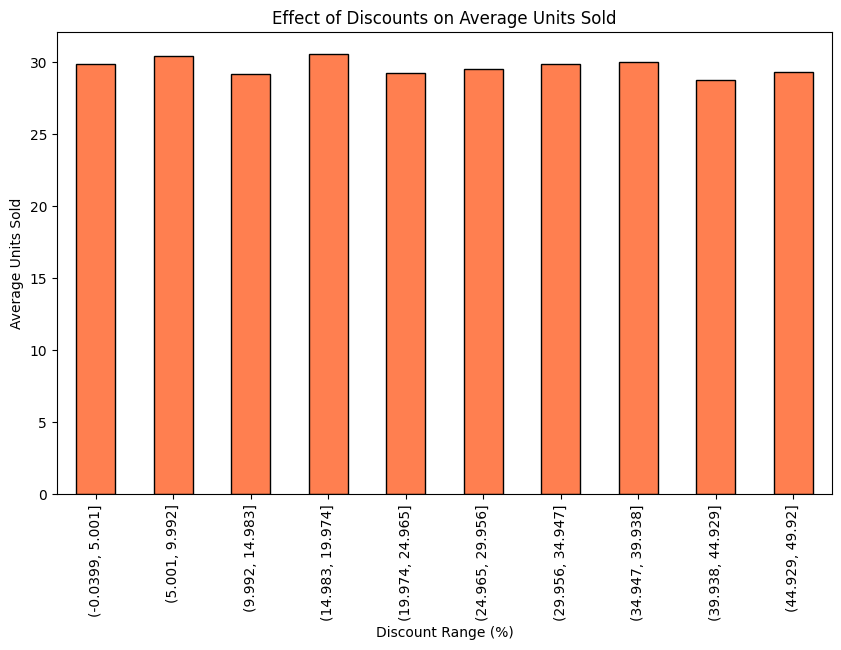

In [43]:
# Visualization 8: Effect of Discounts
discount_effect = data.groupby(pd.cut(data['Discount'], bins=10))['Units_Sold'].mean()
plt.figure(figsize=(10, 6))
discount_effect.plot(kind='bar', color='coral', edgecolor='black')
plt.title("Effect of Discounts on Average Units Sold")
plt.xlabel("Discount Range (%)")
plt.ylabel("Average Units Sold")
plt.show()

C:\Users\Office\AppData\Local\Temp\ipykernel_6856\50639546.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  marketing_impact = data.groupby(pd.cut(data['Marketing_Spend'], bins=10))['Units_Sold'].mean()


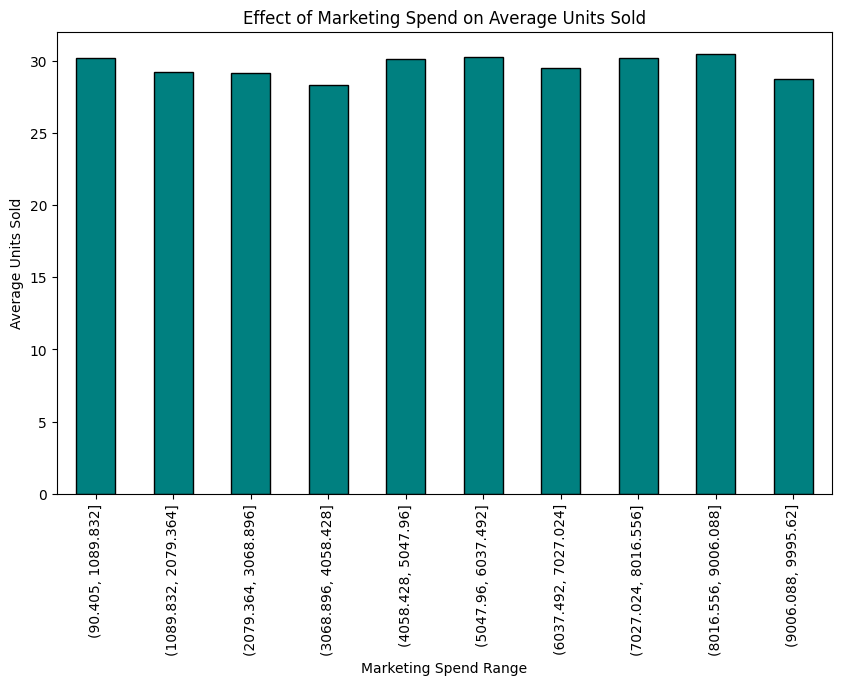

In [44]:
# Visualization 9: Marketing Spend Impact
marketing_impact = data.groupby(pd.cut(data['Marketing_Spend'], bins=10))['Units_Sold'].mean()
plt.figure(figsize=(10, 6))
marketing_impact.plot(kind='bar', color='teal', edgecolor='black')
plt.title("Effect of Marketing Spend on Average Units Sold")
plt.xlabel("Marketing Spend Range")
plt.ylabel("Average Units Sold")
plt.show()

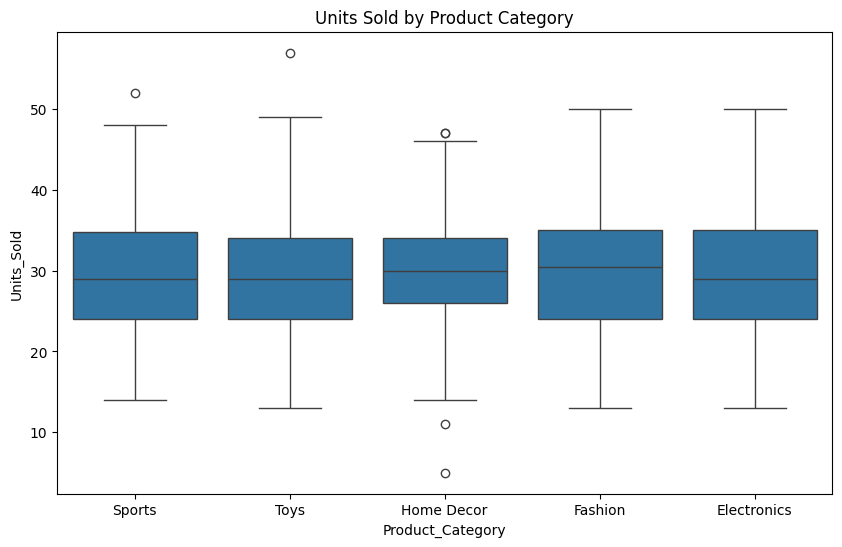

In [30]:
# Box plot of Units Sold by Product Category
plt.figure(figsize=(10,6))
sns.boxplot(x='Product_Category', y='Units_Sold', data=data)
plt.title('Units Sold by Product Category')
plt.show()

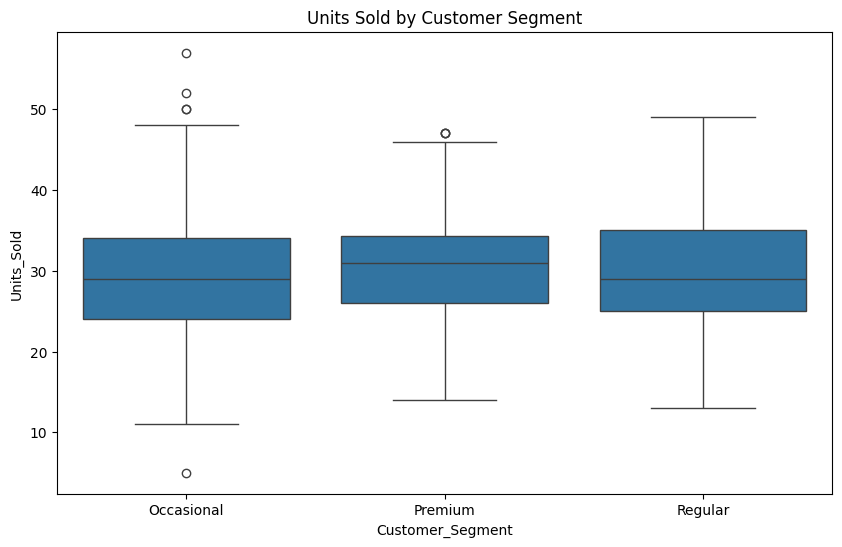

In [31]:
# Box plot of Units Sold by Customer Segment
plt.figure(figsize=(10,6))
sns.boxplot(x='Customer_Segment', y='Units_Sold', data=data)
plt.title('Units Sold by Customer Segment')
plt.show()

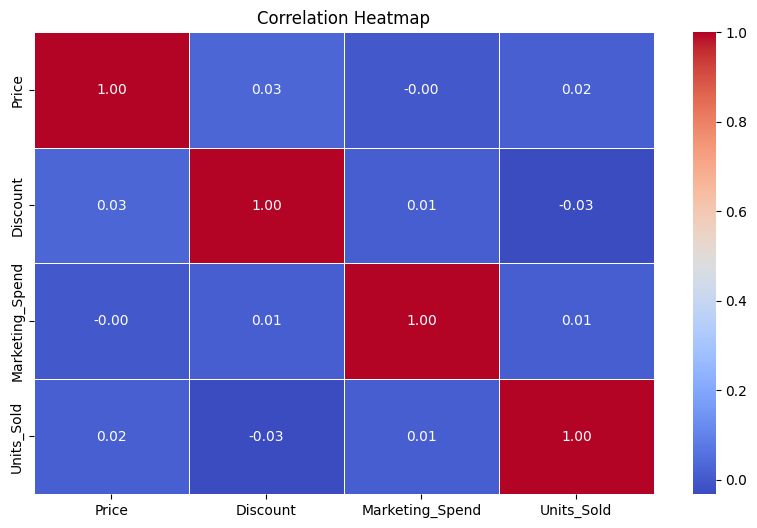

In [35]:
# Correlation heatmap
plt.figure(figsize=(10,6))
correlation_matrix = data[['Price', 'Discount', 'Marketing_Spend', 'Units_Sold']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

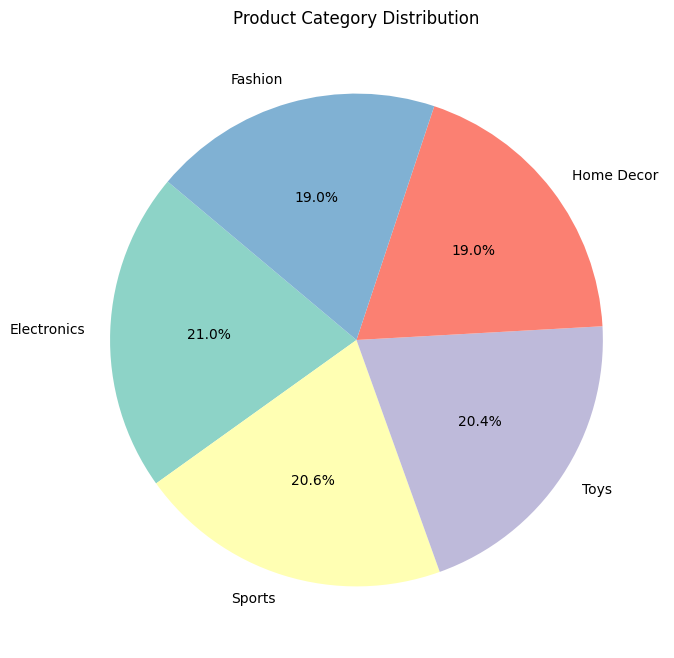

In [48]:
# Pie Chart: Product Category Distribution
category_distribution = data['Product_Category'].value_counts()

plt.figure(figsize=(8, 8))
category_distribution.plot.pie(
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette("Set3", len(category_distribution))
)
plt.title("Product Category Distribution")
plt.ylabel('')  # Remove default y-axis label for aesthetics
plt.show()


In [49]:
# Convert the Date column to datetime for easier manipulation
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Calculate total revenue for each row
data['Total_Revenue'] = data['Price'] * data['Units_Sold']

# Generate insights and recommendations

# 1. Product Category with the Most Revenue
category_revenue = data.groupby('Product_Category')['Total_Revenue'].sum().sort_values(ascending=False)

# 2. Monthly Sales Revenue
data['Month'] = data['Date'].dt.month
monthly_revenue = data.groupby('Month')['Total_Revenue'].sum()

category_revenue, monthly_revenue


(Product_Category
 Sports         3201408.12
 Toys           3030591.65
 Electronics    3022450.44
 Fashion        2968174.28
 Home Decor     2779860.07
 Name: Total_Revenue, dtype: float64,
 Month
 1     1392038.74
 2     1241581.42
 3     1310908.28
 4     1213502.60
 5     1373971.49
 6     1311010.43
 7     1464738.93
 8     1346581.02
 9     1366404.50
 10    1005256.31
 11     968834.42
 12    1007656.42
 Name: Total_Revenue, dtype: float64)